In [6]:
#Add Latex here 

In [7]:
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [62]:
class Gravitational_Orbits():
    
    """
    Class to implement the lagragian for a two body gravitational problem, using the following defined parameters.
    
    Parameters:
    
    m1 : float
        mass of the first object
    m2: float
        mass of the second object
    G: float
        Gravitational Constant 
    
    ----------
    
    Methods:
    
    dz_dt(t, z):
        This function returns the right hand side of the differential equation in vector z, using given time t \
        and coressponding values of z. 
    
    
    """
    
    def __init__(self, m1, m2, G):
        
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
        
    def dz_dt(self, t, z):
        """
        Parameters: 
        t: float
            time
        z: float
            This is an 8 component vector comprising of the following values:
            
            z[0] = x1(t) and z[1] = x1_dot(t)
            z[2] = y1(t) and z[3] = y1_dot(t)
            z[4] = x2(t) and z[5] = x2_dot(t)
            z[6] = y2(t) and z[6] = y2_dot(t)
            
            Here, the x and y are space coordinates, and the x_dot, y_dot are their corresponding time \ 
            derivatives                                        
        
        """
        r_12 = np.sqrt((z[0]-z[4])**2 + (z[2]-z[6])**2)
    
        return [\
                z[1], self.G * self.m2 * (z[4]-z[0]) / r_12**3, \
                z[3], self.G * self.m2 * (z[6]-z[2]) / r_12**3, \
                z[5], -self.G * self.m1 * (z[4]-z[0]) / r_12**3, \
                z[7], -self.G * self.m1 * (z[6]-z[2]) / r_12**3,                                 
               ]
    
    def solve_ode(self, t_pts, z0, abserr=1.e-10, relerr = 1.e-10):
        
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), z0, t_eval = t_pts, \
                            method = "RK23", atol=abserr, rtol=relerr)
        
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        
        
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot 
        
        
        
    #Perhaps add solve_ode by leapfrog method 
    

In [63]:
#Plot function 
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line 

In [64]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [65]:
#Labels 
orbit_labels = (r'$x$', r'$y$')

In [66]:
#time array
t_start = 0.
t_end = 10. 
delta_t = 0.001

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

In [67]:
#initial conditions
G = 1.
m1 = 1.
m2 = 5.

orbit1 = Gravitational_Orbits(m1, m2, G)

In [68]:
#Initial conidtions for position and velocity 

x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.

x2_0, x2_dot_0 = -(m1/m2) * x1_0, (-m1/m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1/m2) * y1_0, (-m1/m2) * y1_dot_0 #Go over this from the video

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]


#Send to the solve_ode function 

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit1.solve_ode(t_pts, z_0)


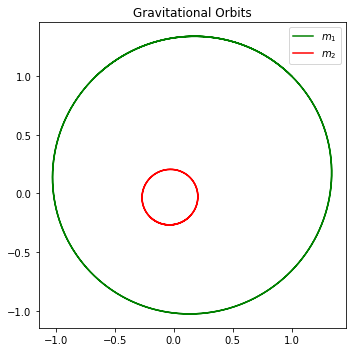

In [54]:
#For plotting 

fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)

ax.plot(x1, y1, color='green', label=r'$m_1$')
ax.plot(x2, y2, color='red', label=r'$m_2$')

ax.set_title("Gravitational Orbits")
ax.legend()
#ax.set_aspect(1)

fig.tight_layout()


In [69]:
#Now try for different masses, where m2>>m1

G = 1.
m1 = 1.
m2 = 20. #m2 >> m1

orbit2 = Gravitational_Orbits(m1, m2, G)

In [70]:
#Initial conidtions for position and velocity 

x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.

x2_0, x2_dot_0 = -(m1/m2) * x1_0, (-m1/m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1/m2) * y1_0, (-m1/m2) * y1_dot_0 #Go over this from the video

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]


#Send to the solve_ode function 

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit2.solve_ode(t_pts, z_0)


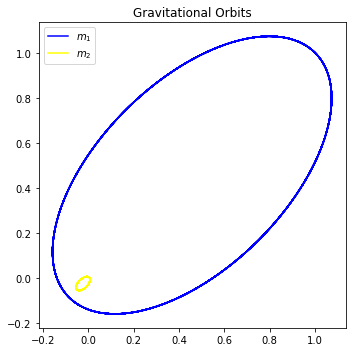

In [71]:
#For plotting 

fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)

ax.plot(x1, y1, color='blue', label=r'$m_1$')
ax.plot(x2, y2, color='yellow', label=r'$m_2$')

ax.set_title("Gravitational Orbits")
ax.legend()
#ax.set_aspect(1)

fig.tight_layout()


In [ ]:
#(Do this in Latex) We see how with m2>> m1, the orbits go from being circular to looking more like an ellipse. 